# Data Science Final Project: Part 2 Analysis

---



This is ia a analysis of the rental data to predict rents for test 3 data.  
This file has been broken up into 3 parts: 


1.   Data Exploration [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=K-ZZpcoaiGY6]
2.   Data Preprocessing [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=HgGR6M-aojEZ]
3.   Data Modelling [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=aPjrrxHJot6h]
4.  Summary of Results and Further Work [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=9IVaqCL3pKBX]





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [2]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['landValues.csv']))

In [6]:
df2.head(5)

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,5060270030,5,6027,30,NaN,LLERENA ROCIO A,A5,1,18,70,NaN,2.0,257000,7981,12820,0,0,NaN,1954 ARTHUR KILL ROAD,10312.0,NaN,18,28,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1,5060270029,5,6027,29,NaN,RICHARD P. DEVLIN,A5,1,18,70,NaN,2.0,257000,7981,12820,1620,1620,1017.0,1952 ARTHUR KILL ROAD,10312.0,NaN,18,28,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
2,5060270028,5,6027,28,NaN,WALTER ACIERTO,A5,1,24,70,NaN,2.0,275100,9341,14042,1620,1620,1017.0,1950 ARTHUR KILL ROAD,10312.0,NaN,24,24,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
3,5060270027,5,6027,27,NaN,GRACE G BUONO,A9,1,24,70,NaN,2.0,275100,9341,14042,0,0,NaN,1948 ARTHUR KILL ROAD,10312.0,NaN,24,24,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
4,5060270026,5,6027,26,NaN,HASAN DJUKANOVIC,A9,1,18,70,NaN,2.0,257000,7981,12820,1620,1620,1017.0,1946 ARTHUR KILL ROAD,10312.0,NaN,18,28,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044532 entries, 0 to 1044531
Data columns (total 31 columns):
BBLE        1044532 non-null int64
B           1044532 non-null int64
BLOCK       1044532 non-null int64
LOT         1044532 non-null int64
EASEMENT    0 non-null float64
OWNER       1014216 non-null object
BLDGCL      1044532 non-null object
TAXCLASS    1044532 non-null object
LTFRONT     1044532 non-null int64
LTDEPTH     1044532 non-null int64
EXT         348916 non-null object
STORIES     996424 non-null float64
FULLVAL     1044532 non-null int64
AVLAND      1044532 non-null int64
AVTOT       1044532 non-null int64
EXLAND      1044532 non-null int64
EXTOT       1044532 non-null int64
EXCD1       621546 non-null float64
STADDR      1044476 non-null object
ZIP         1021214 non-null float64
EXMPTCL     14002 non-null object
BLDFRONT    1044532 non-null int64
BLDDEPTH    1044532 non-null int64
AVLAND2     279946 non-null float64
AVTOT2      279952 non-null float64
EXLAND2

In [0]:
newdata = df2[['BBLE', 'OWNER', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'STADDR', 'ZIP', ]]

In [9]:
newdata.shape

(1044532, 8)

In [10]:
newdata.rename(columns = {'BBLE':'bbl'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [11]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044532 entries, 0 to 1044531
Data columns (total 8 columns):
bbl        1044532 non-null int64
OWNER      1014216 non-null object
STORIES    996424 non-null float64
FULLVAL    1044532 non-null int64
AVLAND     1044532 non-null int64
AVTOT      1044532 non-null int64
STADDR     1044476 non-null object
ZIP        1021214 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 63.8+ MB


In [13]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7236931 to 7422694
Data columns (total 38 columns):
addr_unit                 11909 non-null object
building_id               12000 non-null int64
bedrooms                  12000 non-null int64
bathrooms                 12000 non-null float64
size_sqft                 12000 non-null float64
created_at                12000 non-null object
addr_street               12000 non-null object
addr_city                 12000 non-null object
addr_zip                  12000 non-null int64
addr_lat                  12000 non-null float64
addr_lon                  12000 non-null float64
bin                       11999 non-null float64
bbl                       12000 non-null int64
floor_count               12000 non-null float64
year_built                11597 non-null float64
min_to_subway             11874 non-null float64
has_doorman               12000 non-null int64
has_elevator              12000 non-null int64
has_fireplace    

In [14]:
newdata.describe()

,bbl,STORIES,FULLVAL,AVLAND,AVTOT,ZIP
count,1.044532e+06,996424.000000,1.044532e+06,1.044532e+06,1.044532e+06,1.021214e+06
mean,3.222521e+09,5.063374,8.837578e+05,8.629290e+04,2.316033e+05,1.093548e+04
std,1.196743e+09,8.431377,1.172540e+07,4.108672e+06,6.964620e+06,5.265309e+02
min,1.000010e+09,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000100e+04
25%,3.003240e+09,2.000000,3.058060e+05,9.241000e+03,1.846900e+04,1.045300e+04
50%,3.074750e+09,2.000000,4.470000e+05,1.368000e+04,2.538000e+04,1.121500e+04
75%,4.086430e+09,3.000000,6.200000e+05,1.974300e+04,4.633600e+04,1.136400e+04
max,5.060270e+09,119.000000,6.150000e+09,2.668500e+09,4.668309e+09,3.380300e+04


In [1]:
newdata['bbl']= newdata.bbl.astype(int)

NameError: name 'newdata' is not defined

In [0]:
new_df = pd.merge( train_df,newdata, on="bbl", how="left")

In [0]:
newtest_df = pd.merge( test_df,newdata, on="bbl", how="left")

In [18]:
new_df.head(20)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,OWNER,STORIES,FULLVAL,AVLAND,AVTOT,STADDR,ZIP
0,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,40.646982,-73.960065,3117619.0,3051240001,6.0,1929.0,3.3500,0,1,0,1,0,0,1,1,0,0,0,0,0,0,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN,645 OCEAN LLC,6.0,1170000.0,137700.0,526500.0,645 OCEAN AVENUE,11226.0
1,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,-74.004799,1001883.0,1001737504,17.0,2014.0,3.2333,1,1,0,1,0,1,1,1,0,1,1,0,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,40.755402,-73.967598,1039676.0,1013440001,33.0,2013.0,3.0500,1,1,0,1,0,1,1,0,1,0,0,1,1,0,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A,"964 ASSOCIATES, LLC",4.0,1980000.0,882000.0,891000.0,964 2 AVENUE,10022.0
3,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,40.751301,-73.986298,1015919.0,1008380001,24.0,2019.0,2.0000,1,1,0,1,0,1,1,0,1,1,1,0,0,0,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E,990 AVAMERICAS ASSOC.,24.0,68500000.0,9000000.0,30825000.0,980 AVENUE OF THE AMER,10018.0
4,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,40.681132,-73.944678,3053335.0,3018510053,4.0,1931.0,2.1333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B,WOLF GOLD INC.,4.0,375000.0,21015.0,168750.0,43 MAC DONOUGH STREET,11216.0
5,#1C,104077,3,1.0,0.0,2018-05-11 20:59:17,70 WEST 109 STREET,New York,10025,40.800758,-73.961067,1055734.0,1018440060,6.0,1905.0,1.1667,0,0,0,1,0,0,1,1,0,0,0,0,0,0,2695,1,NO FEE $2750\r\nGrab your friends and come che...,Upper West Side,Manhattan,1C,1.0,C,"CANTOR PROPERTIES, LL",6.0,1620000.0,171450.0,729000.0,70 WEST 109 STREET,10025.0
6,#1,1345519,3,1.0,850.0,2018-06-19 13:20:57,35-57 87 STREET,Jackson Heights,11372,40.750807,-73.879478,4035893.0,4014610057,3.0,1930.0,3.3500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2600,0,Great Location! 5 Minutes Walk To 7 Train. Cl...,Jackson Heights,Queens,1,1.0,NaN,ANDERSON QUINTO,3.0,791000.0,17257.0,31381.0,35-57 87 STREET,11372.0
7,#6G,18341149,0,1.0,500.0,2018-07-28 10:25:29,11-05 30 ROAD,Astoria,11102,40.771198,-73.933800,4000000.0,4005060029,0.0,NaN,11.9500,1,1,0,1,0,1,0,0,0,1,1,0,0,0,2075,0,"Priceless view of NYC, 2 separate rooftops, 24...",Astoria,Queens,6G,6.0,G,30 VERNON LLC,NaN,1516800.0,682560.0,682560.0,30-15 30 ROAD,11106.0
8,#S14A,54856,1,1.0,960.0,2018-06-25 14:04:41,535 WEST 43 STREET,New York,10036,40.761398,-73.996597,1026932.0,1010720050,14.0,2016.0,6.8833,1,1,0,1,0,1,1,1,0,1,1,0,1,1,4996,1,Reduced Security deposit of $1500 on Approved ...,Midtown West,Manhattan,S14A,14.0,SA,"PASHA GROUP, LLC",2.0,3350000.0,985500.0,1507500.0,546 WEST 44 STREET,10036.0
9,#23B,69853,0,1.0,400.0,2018-05-15 17:04:06,250 EAST 54 STREET,New York,10022,40.757301,-73.967201,1038562.0,1013277502,43.0,1990.0,1.2167,1,1,0,1,0,1,1,0,0,1,1,0,0,0,2800,1,"Make yourself at home at The Mondrian, Midtown...",Midtown East,Manhattan,23B,23.0,B,NaN,43.0,0.0,0.0,0.0,250 EAST 54 STREET,10022.0


In [19]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 45 columns):
addr_unit                 11909 non-null object
building_id               12000 non-null int64
bedrooms                  12000 non-null int64
bathrooms                 12000 non-null float64
size_sqft                 12000 non-null float64
created_at                12000 non-null object
addr_street               12000 non-null object
addr_city                 12000 non-null object
addr_zip                  12000 non-null int64
addr_lat                  12000 non-null float64
addr_lon                  12000 non-null float64
bin                       11999 non-null float64
bbl                       12000 non-null int64
floor_count               12000 non-null float64
year_built                11597 non-null float64
min_to_subway             11874 non-null float64
has_doorman               12000 non-null int64
has_elevator              12000 non-null int64
has_fireplace            

## Data Exploration

This section we look at the data and determine the features for our model. We build our training data




In [20]:
new_df.sample(10).transpose()

,2483,10880,6305,11545,8191,8617,7502,4314,8632,125
addr_unit,#44,#12F,#1D,#307,#PHB,#5A,#204,#2L,#2R,#2F
building_id,547267,1228834,1481134,79600,808,20002,349114,577945,1280041,779422
bedrooms,1,1,1,1,3,1,1,1,3,2
bathrooms,1,1,1,1,2,1,1,1,1,1
size_sqft,700,1034,750,700,2250,675,875,700,1100,700
created_at,2018-06-18 21:03:18,2018-07-31 14:18:56,2018-07-12 09:43:29,2018-05-14 15:40:37,2018-07-26 22:09:14,2018-06-15 17:53:04,2018-07-25 18:02:48,2018-06-27 16:32:46,2018-06-11 11:43:05,2018-05-05 10:14:28
addr_street,35 STRATFORD ROAD,3660 OXFORD AVENUE,83-31 116 STREET,400 EAST 70 STREET,111 WASHINGTON STREET,67 THOMPSON STREET,460 DRIGGS AVENUE,465 EAST 7 STREET,30-29 48 STREET,2033 STILLWELL AVENUE
addr_city,Brooklyn,Bronx,Richmond Hill,New York,New York,New York,Brooklyn,Brooklyn,Astoria,Brooklyn
addr_zip,11218,10463,11418,10021,10006,10012,11211,11218,11103,11223
addr_lat,40.6479,40.8878,40.7056,40.7661,40.7088,40.7244,40.7192,40.6404,40.76,40.5971


In [21]:
new_df.shape

(12000, 45)

In [22]:
test_df.shape

(2000, 38)

In [24]:
newtest_df.shape

(2000, 45)

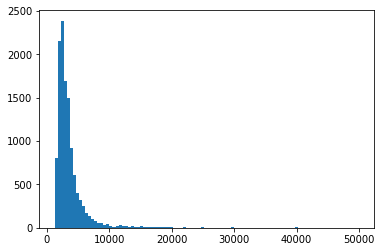

In [25]:
_ = plt.hist(train_df['rent'], bins=100)

In [26]:
new_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

In [27]:
new_df['rent'].isna().sum()

0

In [0]:
print(list(train_df))

['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']


In [0]:
train_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,11597.000000,11874.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,1935.982668,73.588716,0.300333,0.466083,0.035917,0.542583,0.029833,0.293000,0.496667,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,158.157134,2681.611157,0.458422,0.498869,0.186090,0.498204,0.170134,0.455157,0.500010,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,0.000000,0.016700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,1915.000000,1.616700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,1931.000000,2.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,1987.000000,4.366700,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,2019.000000,103343.616700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [28]:
new_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber,STORIES,FULLVAL,AVLAND,AVTOT,ZIP
building_id,1.000000,-0.001813,-0.016501,-0.006433,0.064199,-0.008653,0.105315,0.117460,0.090194,-0.116488,0.026593,-0.006980,-0.042830,0.061696,-0.031611,0.023323,-0.012521,0.004550,0.040899,-0.030651,0.099141,-0.012773,-0.060398,0.038340,0.064100,0.011357,-0.035145,0.052429,-0.003418,-0.029112,0.381789,0.352293,0.382218,0.056718
bedrooms,-0.001813,1.000000,0.464287,0.525537,0.187639,-0.114986,0.093089,0.142331,0.151078,-0.228858,-0.056614,0.014171,-0.233059,-0.278231,0.049998,0.046002,-0.046021,-0.206094,0.023819,0.117120,-0.116837,-0.085111,-0.202524,-0.091116,0.048234,-0.083456,0.353337,-0.004335,-0.158895,-0.233656,-0.027877,-0.019402,-0.029652,0.204945
bathrooms,-0.016501,0.464287,1.000000,0.565788,-0.088524,0.028441,-0.062992,-0.100642,-0.106358,0.091489,-0.004480,0.017966,0.108987,0.095867,0.124532,0.161132,0.050068,0.113062,0.087348,0.298722,0.051650,0.102592,0.105276,0.089527,0.104741,0.111949,0.611987,-0.003053,0.116938,0.080629,-0.022447,-0.017811,-0.023238,-0.081013
size_sqft,-0.006433,0.525537,0.565788,1.000000,0.000576,-0.037717,-0.035054,-0.013148,-0.011608,0.020547,-0.021524,0.007718,0.047766,0.029836,0.155044,0.111761,0.041965,0.022605,0.032325,0.263907,0.005959,0.026781,0.040962,0.051020,0.137652,0.068867,0.649984,-0.074162,0.054328,0.020856,-0.002808,-0.001830,-0.004343,0.017112
addr_zip,0.064199,0.187639,-0.088524,0.000576,1.000000,-0.577385,0.462277,0.950995,0.952018,-0.447352,-0.004916,0.023660,-0.410034,-0.362939,-0.072233,-0.166108,-0.135857,-0.287916,-0.115378,-0.113234,-0.116047,-0.107670,-0.354300,-0.193333,-0.006699,-0.162588,-0.325241,-0.066025,-0.376063,-0.505026,-0.212199,-0.193084,-0.212601,0.999708
addr_lat,-0.008653,-0.114986,0.028441,-0.037717,-0.577385,1.000000,0.219029,-0.429858,-0.424711,0.195647,-0.002415,-0.026215,0.191486,0.167685,0.019505,0.078029,0.054610,0.115376,0.015503,0.013967,0.057687,-0.000782,0.146865,0.104243,0.000178,0.066387,0.109536,0.002401,0.170598,0.224366,0.046720,0.042737,0.047242,-0.575904
addr_lon,0.105315,0.093089,-0.062992,-0.035054,0.462277,0.219029,1.000000,0.554511,0.563806,-0.281790,-0.003623,-0.012528,-0.259673,-0.182011,-0.070451,-0.138343,-0.085478,-0.224737,-0.153365,-0.165555,-0.055615,-0.168426,-0.270704,-0.100606,-0.038981,-0.140828,-0.262711,-0.041091,-0.239193,-0.279960,-0.107414,-0.090398,-0.106939,0.466242
bin,0.117460,0.142331,-0.100642,-0.013148,0.950995,-0.429858,0.554511,1.000000,0.994155,-0.426813,0.010451,0.021091,-0.380284,-0.326176,-0.084767,-0.173532,-0.131706,-0.263453,-0.144695,-0.119801,-0.089042,-0.112548,-0.323696,-0.182156,-0.007928,-0.144938,-0.332165,-0.111486,-0.350957,-0.484954,-0.202364,-0.184592,-0.202527,0.952247
bbl,0.090194,0.151078,-0.106358,-0.011608,0.952018,-0.424711,0.563806,0.994155,1.000000,-0.442496,0.005694,0.015880,-0.403373,-0.351657,-0.081656,-0.185248,-0.132950,-0.292240,-0.160086,-0.137143,-0.109457,-0.135245,-0.346828,-0.193851,-0.021434,-0.169315,-0.339157,-0.126716,-0.367065,-0.494332,-0.206298,-0.188568,-0.206563,0.953139
floor_count,-0.116488,-0.228858,0.091489,0.020547,-0.447352,0.195647,-0.281790,-0.426813,-0.442496,1.000000,0.151318,-0.011722,0.664202,0.560443,-0.024808,0.229530,0.112042,0.633673,0.205669,0.177199,0.380581,0.361168,0.655252,0.498138,0.084536,0.395460,0.253517,0.185316,0.769707,0.953442,0.102578,0.083382,0.104482,-0.468882


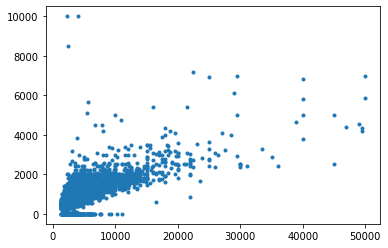

In [29]:
_ = plt.plot(train_df['rent'], train_df['size_sqft'], marker='.', linestyle='none')

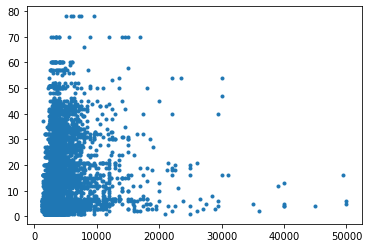

In [32]:
_ = plt.plot(new_df['rent'], new_df['STORIES'], marker='.', linestyle='none')

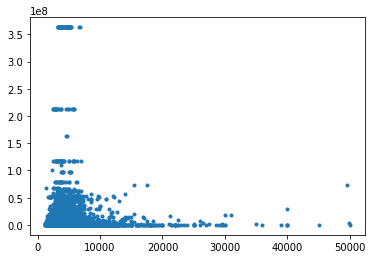

In [30]:
_ = plt.plot(new_df['rent'], new_df['AVTOT'], marker='.', linestyle='none')

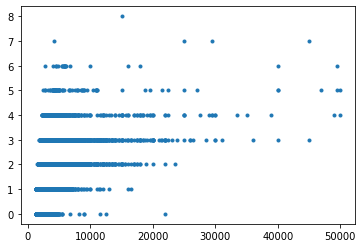

In [0]:
_ = plt.plot(train_df['rent'], train_df['bedrooms'], marker='.', linestyle='none')

In [0]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'AVTOT', 'FULLVAL', 'STORIES'
]
new_features = new_df[feature_cols] 

## Data Preprocessing

This section we look at missing data and outliers and deal with these



#### 1. Missing Data
'min_to_subway', 'year_built' , 'floornumber' have NaNs. Solutions: drop or impute. This round we will impute as the feature 'floornumber' has 10% (1200) values missing and dropping this would reduce the data to only 10,000 points. 

In [0]:
train_df['bedrooms'].isna().sum()


0

In [0]:
train_df['year_built'].isna().sum()

403

In [0]:
train_df['bathrooms'].isna().sum()

0

In [0]:
train_df['min_to_subway'].isna().sum()

126

In [0]:
train_df['size_sqft'].isna().sum()

0

In [0]:
train_df['no_fee'].isna().sum()

0

In [0]:
train_df['has_doorman'].isna().sum()

0

In [0]:
train_df['has_washer_dryer'].isna().sum()

0

In [0]:
train_df['floornumber'].isna().sum()

1277

In [0]:
train_df['floornumber'].describe()


count    10723.000000
mean         6.182738
std          7.671545
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         78.000000
Name: floornumber, dtype: float64

In [0]:

test_df['floornumber'].describe()

count    1775.000000
mean        6.291831
std         8.066341
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        71.000000
Name: floornumber, dtype: float64

In [0]:
train_df['min_to_subway'].describe()

count     11874.000000
mean         73.588716
std        2681.611157
min           0.016700
25%           1.616700
50%           2.750000
75%           4.366700
max      103343.616700
Name: min_to_subway, dtype: float64

In [0]:
test_df['min_to_subway'].describe()

count    1983.000000
mean        3.768095
std         4.110479
min         0.016700
25%         1.666700
50%         2.816700
75%         4.458350
max        57.583300
Name: min_to_subway, dtype: float64

In [0]:
train_df['year_built'].describe()

count    11597.000000
mean      1935.982668
std        158.157134
min          0.000000
25%       1915.000000
50%       1931.000000
75%       1987.000000
max       2019.000000
Name: year_built, dtype: float64

In [0]:
test_df['year_built'].describe()

count    1933.000000
mean     1934.515261
std       164.135048
min         0.000000
25%      1915.000000
50%      1931.000000
75%      1987.000000
max      2019.000000
Name: year_built, dtype: float64

The features all have large outliers that result in a much higher mean than median so we will use median for the impute value for the missing values. 

In [0]:
# impute missing values with medians
new_features = new_features.fillna(new_features.median(), axis=0)

# construct target vector
new_target = new_df['rent']

## Data Modelling 
This section we look at different models and model our training data

In [35]:
# training a linear regression model
lreg = LinearRegression()
lreg.fit(new_features, new_target)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(new_features, new_target)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(new_features, new_target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
test_features = newtest_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(new_features.median(), axis=0)

In [37]:
# construct predictions for linear regression 
newtest_df['predicted'] = lreg.predict(test_features)

mean_squared_error(newtest_df['rent'], newtest_df['predicted'])

3624470.7023218083

In [38]:
pd.DataFrame(lreg.coef_, index=feature_cols,  columns = ['Est. Coefficient'])

,Est. Coefficient
bedrooms,87.952511
year_built,-0.262176
bathrooms,1572.680927
min_to_subway,-0.008647
size_sqft,2.314575
no_fee,-230.209344
has_doorman,977.684557
has_washer_dryer,565.158215
floornumber,42.124759
AVTOT,-0.000538


In [42]:
# construct predictions for random forest regression
newtest_df['predicted'] = rf.predict(test_features)

mean_squared_error(newtest_df['rent'], newtest_df['predicted'])

2251944.644616933

In [44]:
# construct predictions for gradient boosting regression
newtest_df['predicted'] = gbt.predict(test_features)

mean_squared_error(newtest_df['rent'], newtest_df['predicted'])

2177551.454318485

## Summary of Results and Further Work
This section we look at the results of the modelling. Compare the results of the different models and then make decisions about further work to try improve the accuracy of our model in predicting the rents.

Model | Description| MSE
--- | --- | --
Linear Regression | train_df: No additional data | 3674316.2820333852
Random Forrest | train_df: No additional | 2284878.990318595
Gradient Boosting | train_df: No additional | 2367734.7918685228
Linear Regression | newtrain_df: New Land value data added |3624470.7023218083
Random Forrest |  newtrain_df: New Land value data added | 2177551.454318485

In [46]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: size_sqft            Importance: 0.55
Variable: bathrooms            Importance: 0.16
Variable: STORIES              Importance: 0.06
Variable: year_built           Importance: 0.04
Variable: has_doorman          Importance: 0.04
Variable: floornumber          Importance: 0.04
Variable: AVTOT                Importance: 0.04
Variable: min_to_subway        Importance: 0.03
Variable: FULLVAL              Importance: 0.03
Variable: bedrooms             Importance: 0.02
Variable: no_fee               Importance: 0.01
Variable: has_washer_dryer     Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None, None]

The results above show that the additional data didnt have much affect upon predicting the rental price. The land value did not correlate with the rental price and did have that much importance in the model, the number of STORIES had more importance. At this stage, we would like to find better data that would have more impact upon the model